Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


Importing the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Update the file path to match your dataset's location
dataset_path = '/content/drive/My Drive/ML CW/bank-full.csv'

# Load the dataset
data = pd.read_csv(dataset_path, sep=';')

# Ensure the DataFrame is displayed in an organized way
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.width', 1000)       # Avoid line breaks
pd.set_option('display.float_format', '{:.2f}'.format)  # Format float numbers

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Display column information
print("\nColumn Information:")
data.info()

# Display a statistical summary of numeric columns
print("\nStatistical Summary of the Dataset:")
print(data.describe())

Mounted at /content/drive
First 5 rows of the dataset:
   age           job  marital  education default  balance housing loan  contact  day month  duration  campaign  pdays  previous poutcome   y
0   58    management  married   tertiary      no     2143     yes   no  unknown    5   may       261         1     -1         0  unknown  no
1   44    technician   single  secondary      no       29     yes   no  unknown    5   may       151         1     -1         0  unknown  no
2   33  entrepreneur  married  secondary      no        2     yes  yes  unknown    5   may        76         1     -1         0  unknown  no
3   47   blue-collar  married    unknown      no     1506     yes   no  unknown    5   may        92         1     -1         0  unknown  no
4   33       unknown   single    unknown      no        1      no   no  unknown    5   may       198         1     -1         0  unknown  no

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Da

In [ ]:
# Encode categorical variables
print("\nEncoding categorical variables...")
data_encoded = pd.get_dummies(data, drop_first=True)

# Ensure the target column exists
if 'y_yes' not in data_encoded.columns:
    print("Target column 'y_yes' is missing after encoding. Please check the dataset.")
    exit()

# Define features (X) and target (y)
X = data_encoded.drop('y_yes', axis=1)  # Assuming 'y' is the target column
y = data_encoded['y_yes']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nData split complete:")
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")


Encoding categorical variables...

Data split complete:
Training set size: 36168 samples
Testing set size: 9043 samples


In [ ]:
# Train a simple model (Random Forest Classifier)
print("\nTraining Random Forest Classifier...")
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Training Random Forest Classifier...

Model Evaluation:
Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.95      7952
        True       0.67      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043


Confusion Matrix:
[[7737  215]
 [ 655  436]]


In [ ]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop('y_yes', axis=1)  # Assuming 'y' is the target column
y = data_encoded['y_yes']

# Convert features to numeric type
X = X.astype(np.float32) # This line is crucial

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7827 - loss: 11.0025 - val_accuracy: 0.8789 - val_loss: 0.3832
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8564 - loss: 0.8431 - val_accuracy: 0.8810 - val_loss: 0.5121
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8611 - loss: 0.7933 - val_accuracy: 0.8809 - val_loss: 0.4370
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8683 - loss: 0.6751 - val_accuracy: 0.8593 - val_loss: 0.4263
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8755 - loss: 0.5337 - val_accuracy: 0.8311 - val_loss: 0.5683
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8777 - loss: 0.5405 - val_accuracy: 0.8895 - val_loss: 0.3606
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8797 - loss: 0.4138 - val_accuracy: 0.6879 - val_loss: 1.6765
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8710 - loss: 0.7113 - val_accura

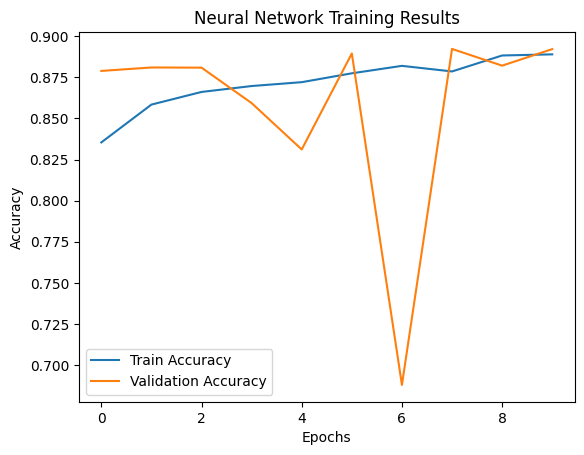

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define the neural network
nn_model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    Dense(16, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with accuracy tracking
nn_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

# Train the model
history = nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Plot the training results
plt.plot(history.history['accuracy'], label='Train Accuracy')  # 'accuracy' key is now available
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # 'val_accuracy' key is also available
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Neural Network Training Results')
plt.show()


In [ ]:
# Random Forest Evaluation
rf_predictions = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

# Neural Network Evaluation
nn_loss, nn_accuracy = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network Accuracy: {nn_accuracy:.2f}")


Random Forest Accuracy: 0.8950276243093923
Neural Network Accuracy: 0.83
